In [1]:
import torch # use torch.tensor instead of np.array
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipympl

In [10]:
data = pd.read_csv("day_head_circumference.csv")

x_train = torch.tensor(data["# day"]).reshape(-1, 1)
y_train = torch.tensor(data["head circumference"]).reshape(-1, 1)

In [46]:
class NonLinearRegressionModel:

    def __init__(self):
        #Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)
        self.b = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)


    def f(self, x):
        return 20 * torch.sigmoid(x @ self.W + self.b) + 31

    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y) # Bruker heller denne for litt bedre W- og b-verdier
        #return torch.mean(torch.square(self.f(x) - y))

In [51]:
model = NonLinearRegressionModel()

#Optimize: adjust W and b to minimize loss using Stochastic Gradient Descent(SGD)
optimizer = torch.optim.SGD([model.W, model.b], 0.00001)
for epoch in range(1000000):
    model.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    optimizer.zero_grad() #Clear gradients for next step

In [52]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.0078]], dtype=torch.float64, requires_grad=True), b = tensor([[-1.4759]], dtype=torch.float64, requires_grad=True), loss = tensor(4.7762, dtype=torch.float64, grad_fn=<MseLossBackward0>)


tensor([[   2.],
        [   3.],
        [   4.],
        ...,
        [1853.],
        [1854.],
        [1855.]], dtype=torch.float64)


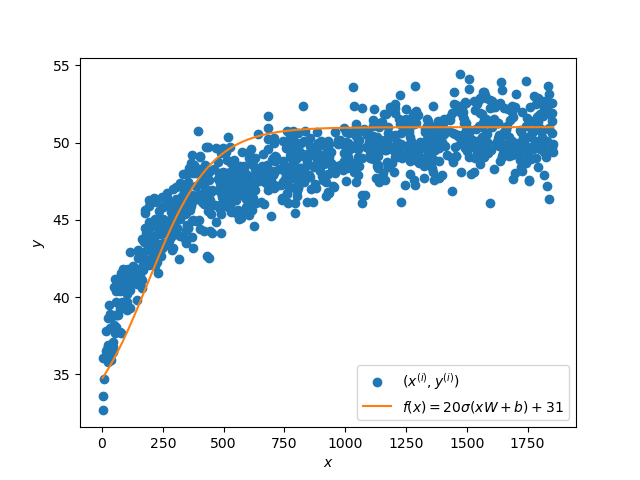

In [56]:
# Visualisering
%matplotlib widget

plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')

plt.xlabel("$x$")
plt.ylabel("$y$")

#x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])
x = torch.arange(torch.min(x_train), torch.max(x_train), dtype=torch.double).reshape(-1,1)

#print(x)

plt.plot(x, model.f(x).detach(), label='$f(x) = 20σ(xW + b) + 31$')

plt.legend()
plt.show()